### 다중 회귀 분석 실험

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 학습에 대한 콜백함수 처리용 패키지 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import ols

#### 데이터 불러오기

In [2]:
df = pd.read_excel('http://itpaper.co.kr/data/cars93.xlsx', engine='openpyxl')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


#### 데이터 전처리

In [3]:
# 분석에 필요한 컬럼만 추출하기

fdf = df.filter(['EngineSize', 'RPM', 'Weight', 'Price'])
fdf

,EngineSize,RPM,Weight,Price
0,1.8,6300,2705,15.9
1,3.2,5500,3560,33.9
2,2.8,5500,3375,29.1
3,2.8,5500,3405,37.7
4,3.5,5700,3640,30.0
...,...,...,...,...
88,2.5,4500,3960,19.7
89,2.0,5800,2985,20.0
90,2.8,5800,2810,23.3
91,2.3,5400,2985,22.7


#### EDA

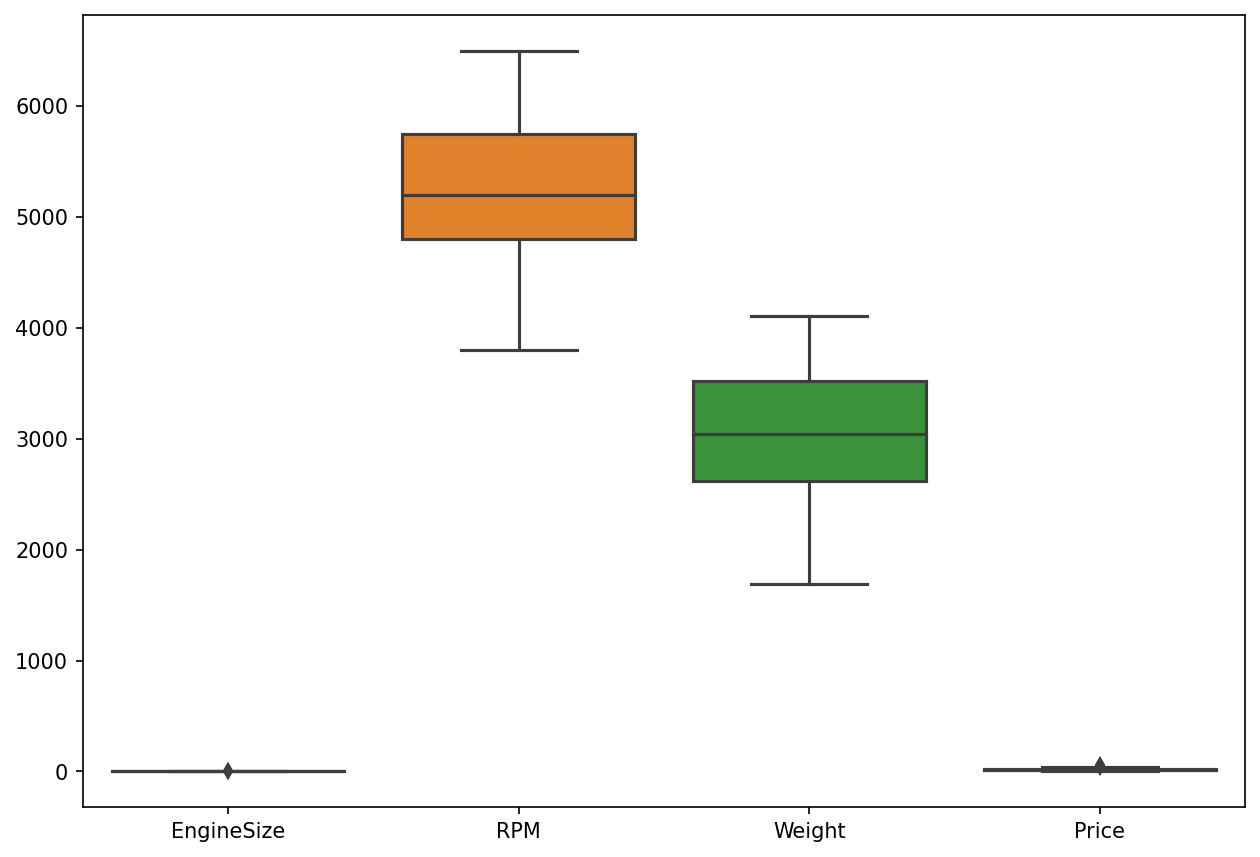

In [4]:
# 데이터분포 시각화 확인


fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
sns.boxplot(data=fdf, ax=ax)
plt.show()
plt.close()

#### 데이터셋 분할

In [5]:
# 랜덤시드 고정

np.random.seed(777)

In [6]:
# 훈련데이터 (독립변수)와 레이블(종속변수) 구분

# 독립변수
x_train_set = fdf.filter(['EngineSize', 'RPM', 'Weight'])
# 종속변수
y_train_set = fdf.filter(['Price'])

In [7]:
# 훈련데이터와 검증데이터로 분할

x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, test_size = 0.33, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 62, 검증용 데이터셋 크기: 31


In [8]:
# 데이터 표준화 수행

scaler = StandardScaler()

std_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
std_x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

std_y_train = pd.DataFrame(scaler.fit_transform(y_train), columns=y_train.columns, index=y_train.index)
std_y_test = pd.DataFrame(scaler.transform(y_test), columns=y_test.columns, index=y_test.index)

Text(0.5, 1.0, 'after')

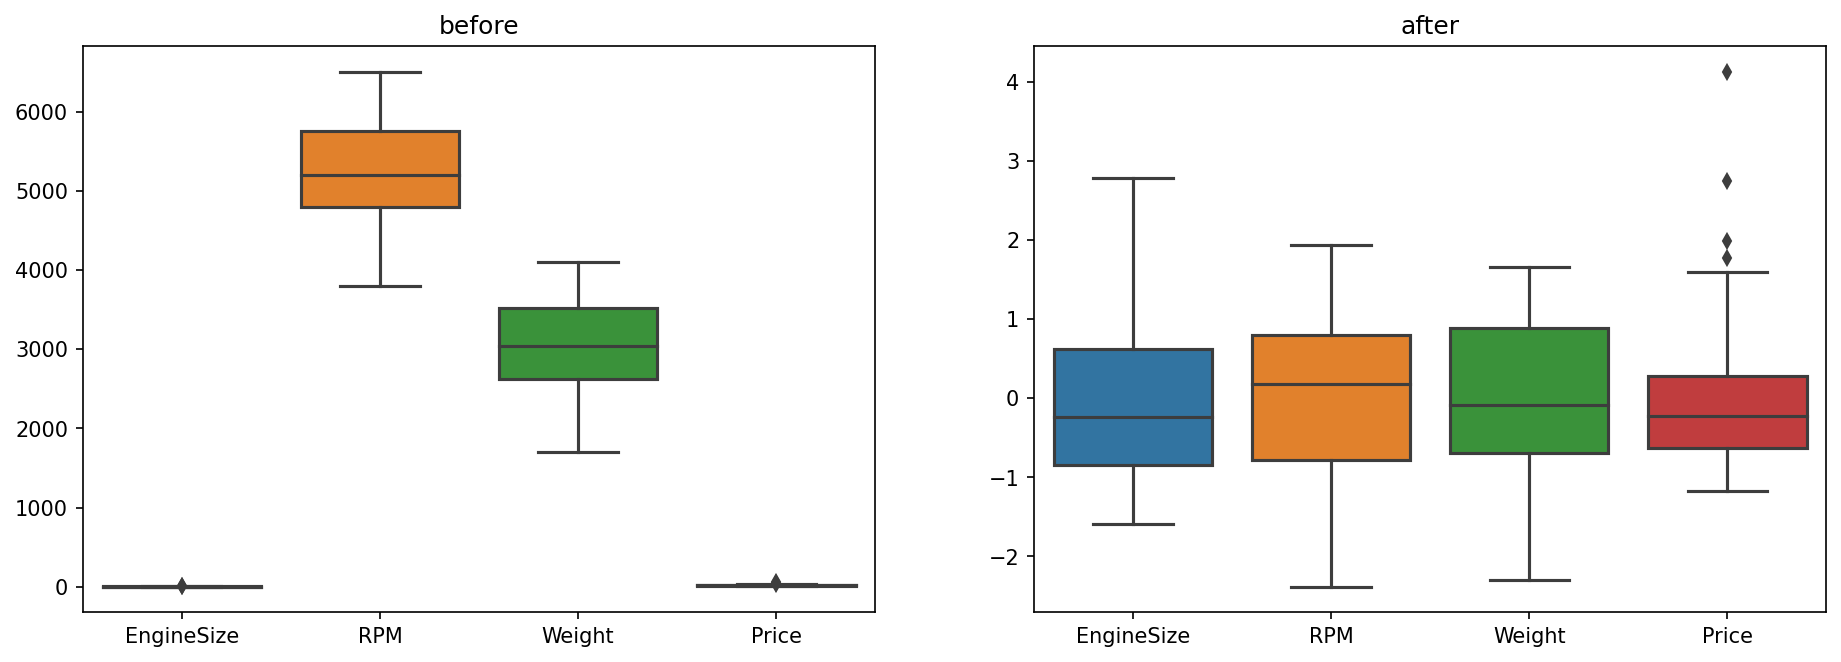

In [9]:
# 데이터 표준화 전,후 에따른 데이터분포 시각화 확인

tmp = pd.merge(std_x_train, std_y_train, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
sns.boxplot(data=fdf, ax=ax[0])
sns.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')

#### 모델 개발

In [10]:
# 모델 정의

# 데이터가 단순하고 개수가 적다면 과대적합이 발생할 확률이 높기 때문에 주의하면서 적절한 크기의 모델층을 쌓아야 한다.
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (3, )))
model.add(Dense(32, activation = 'relu'))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습

result = model.fit(std_x_train, std_y_train, epochs = 500, validation_data = (std_x_test, std_y_test), callbacks = [
    #ModelCheckpoint(filepath = '{epoch:02d}-{val_loss:.5f}.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
2/2 [==============================] - 1s 226ms/step - loss: 0.8460 - mae: 0.6730 - val_loss: 0.5682 - val_mae: 0.6471
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 0.7747 - mae: 0.6439 - val_loss: 0.5231 - val_mae: 0.6193
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 0.7317 - mae: 0.6226 - val_loss: 0.4811 - val_mae: 0.5913
Epoch 4/500
2/2 [==============================] - 0s 27ms/step - loss: 0.6761 - mae: 0.5973 - val_loss: 0.4438 - val_mae: 0.5633
Epoch 5/500
2/2 [==============================] - 0s 27ms/step - loss: 0.6356 - mae: 0.5747 - val_loss: 0.4105 - val_mae: 0.5362
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.5966 - mae: 0.5532 - val_loss: 0.3812 - val_mae: 0.5099
Epoch 7/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5615 - mae: 0.5316 - val_loss: 0.3565 - val_mae: 0.4866
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 0.5321 - mae: 0.5

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.845961,0.673035,0.568179,0.647082,0.0010
2,0.774722,0.643937,0.523066,0.619258,0.0010
3,0.731684,0.622556,0.481148,0.591314,0.0010
4,0.676130,0.597262,0.443830,0.563348,0.0010
5,0.635649,0.574747,0.410537,0.536202,0.0010
6,0.596628,0.553249,0.381150,0.509884,0.0010
7,0.561522,0.531571,0.356467,0.486578,0.0010
8,0.532073,0.508355,0.336304,0.467779,0.0010
9,0.504596,0.489263,0.319836,0.451635,0.0010


#### 학습 결과

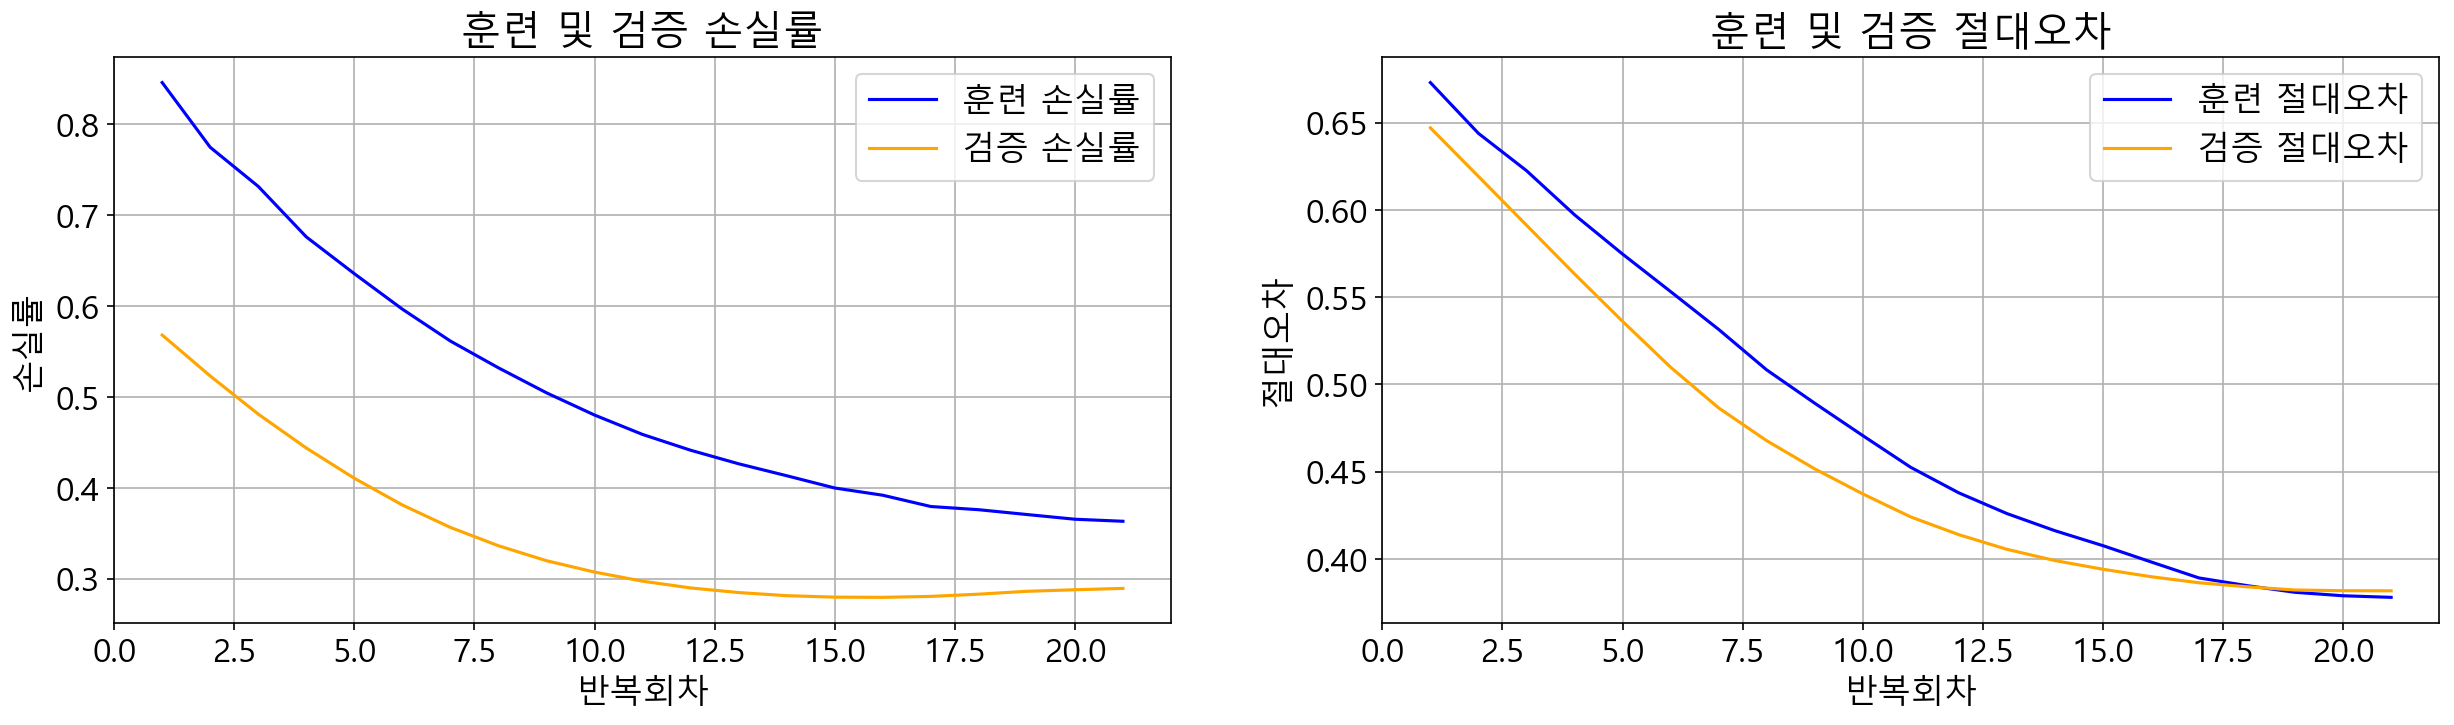

In [12]:
# 학습 결과 시각화

# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sns.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('절대오차')
ax2.grid()
ax2.legend()

In [13]:
# 모델 성능 평가

evaluate = model.evaluate(x_test, y_test)
print("최종 손실률: %f, 최종 절대오차: %f" % (evaluate[0], evaluate[1]))

1/1 [==============================] - 0s 27ms/step - loss: 13793636.0000 - mae: 3701.7654
최종 손실률: 13793636.000000, 최종 절대오차: 3701.765381


#### 학습된 내용 결과적용

In [14]:
# 테스트 데이터에 따른 예측 결과 산정

test_predictions = model.predict(std_x_test)
test_predictions

array([[-1.24421   ],
       [ 0.9896891 ],
       [ 0.30668303],
       [-0.19533165],
       [-0.3372482 ],
       [-0.81249213],
       [-0.23577212],
       [-0.6766155 ],
       [-0.4624008 ],
       [ 0.79677105],
       [-0.8361468 ],
       [-0.57636964],
       [ 0.34333768],
       [-0.55284035],
       [-0.6623154 ],
       [ 0.03203915],
       [ 1.4084768 ],
       [-0.31662583],
       [-0.6190999 ],
       [ 0.63099146],
       [ 0.02228499],
       [-0.8380971 ],
       [ 0.4703786 ],
       [-0.38781118],
       [ 0.16138843],
       [ 0.32262492],
       [ 0.4963891 ],
       [-0.42880303],
       [-0.28870925],
       [ 0.62323564],
       [ 0.3226249 ]], dtype=float32)

In [15]:
# 결과 데이터 셋 구성

result_df = std_x_test.copy()
result_df['실제값'] = std_y_test['Price'].values
result_df['예측값'] = test_predictions.flatten()
result_df['예측오차'] = result_df['실제값']-result_df['예측값']
result_df.head()

,EngineSize,RPM,Weight,실제값,예측값,예측오차
30,-1.311426,-0.462142,-2.055884,-1.227655,-1.244210,0.016555
1,0.454128,0.338216,0.761154,1.373296,0.989689,0.383607
6,1.011671,-0.782285,0.613321,0.087543,0.306683,-0.219140
88,-0.196339,-1.262500,1.418189,-0.020421,-0.195332,0.174910
26,-0.196339,-0.782285,-0.027288,-0.422833,-0.337248,-0.085584


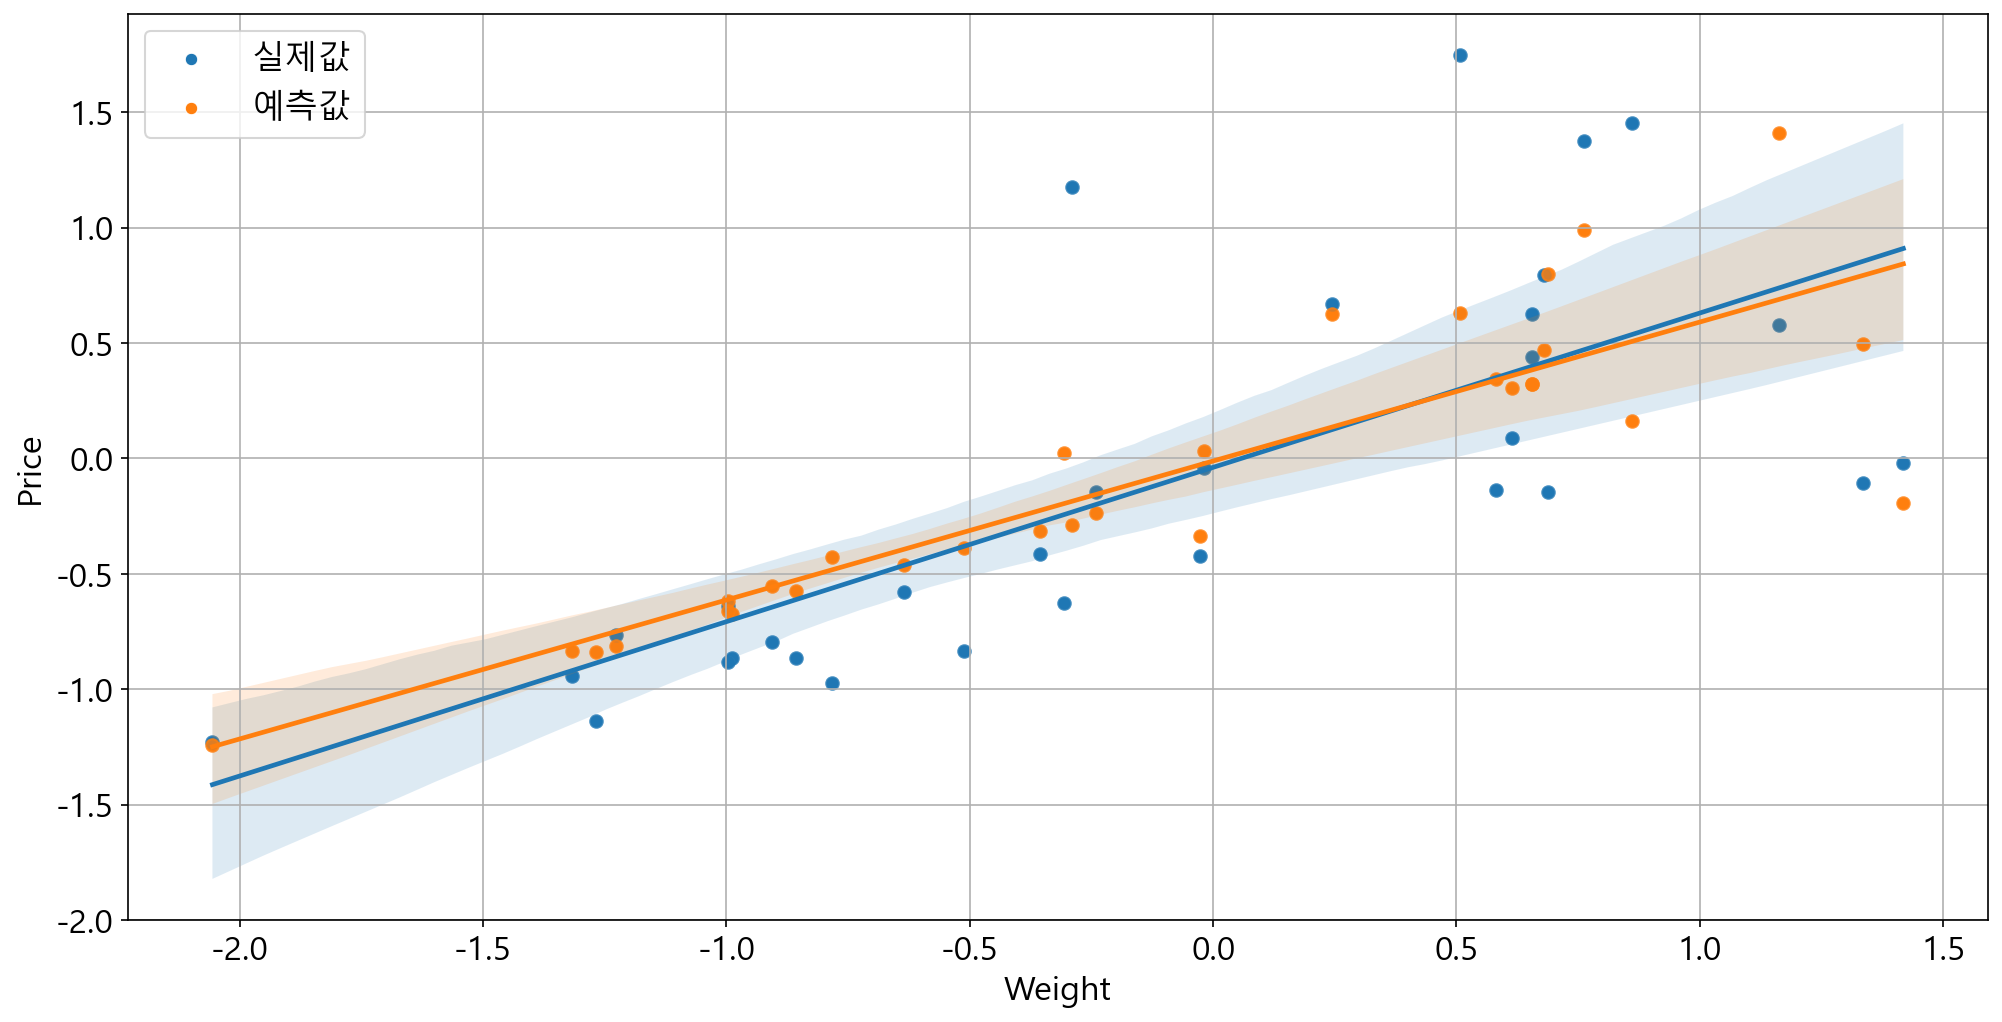

In [16]:
# 실제 결과값과 머신러닝에 의한 예챡값 비교

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
sns.scatterplot(x='Weight', y='실제값', data=result_df, label='실제값', ax=ax1)
sns.scatterplot(x='Weight', y='예측값', data=result_df, label='예측값', ax=ax1)
sns.regplot(x='Weight', y='실제값', data=result_df, ax=ax1)
sns.regplot(x='Weight', y='예측값', data=result_df, ax=ax1)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()